# LOAN PREDICTION

### Introduction & Business Understanding
Project ini diperuntukkan untuk **memprediksi** apakah pinjaman **diterima** atau **ditolak** dari data loan yang tersedia (loan_data_2004_2017.csv).  
Permasalahan yang kita hadapi yaitu klasifikasi dengan dua kelas (pinjaman diterima atau ditolak) : *binary classification*

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import joblib

from sklearn.model_selection import train_test_split

sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
TASK = 'Classification'
TARGET = 'loan_status'
TEST_SIZE = 0.2

### Data Understanding

##### **Import Data**
Setelah melakukan reading/import data, diperlukan proses memahami data yang dapat kita mulai dari :
- memahami atribut-atribut yang ada pada data
- memahami atribut yang akan menjadi target
- membuat ringkasan singkat mengenai data (size: jumlah data, jumlah atribut)
- memahami masalah yang ada pada data ( contoh null data, inakurasi, outlier, persebaran), dapat dilakukan dengan EDA prosees dengan memvisualisasikan data, maupun dengan metode statistik.

In [ ]:
# Reading the data
loan = pd.read_csv("/content/drive/MyDrive/WORKSHOP/EX WOWRACK AZA/Python/loan_data_2007_2014.csv", index_col=0)

# Reading file which consist of additional data information
description = pd.read_excel("/content/drive/MyDrive/WORKSHOP/EX WOWRACK AZA/Python/LCDataDictionary.xlsx", sheet_name="browseNotes").dropna()

In [ ]:
# Take a peek of the data
loan.head(10)

## Terlihat dari 10 sampel, ada kolom-kolom yang berisi null. Pada proses selanjutnya null values ini harus ditangani.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Memahami atribut-atribut yang ada
# description.drop(["Description"], axis=1, inplace=True)
import re
description['Features'] = description['Features'].apply(lambda x : re.sub('[0-9_]', '', x).lower())
description.style.set_properties(subset=['Translate'], **{'width' :'850px'})

,Features,Description,Translate
0,acceptd,The date which the borrower accepted the offer,Tanggal di mana peminjam menerima tawaran itu
1,accnowdelinq,The number of accounts on which the borrower is now delinquent.,Jumlah akun di mana peminjam sekarang nakal.
2,accopenpastmths,Number of trades opened in past 24 months.,Jumlah perdagangan dibuka dalam 24 bulan terakhir.
3,addrstate,The state provided by the borrower in the loan application,Negara yang disediakan oleh peminjam dalam aplikasi pinjaman
4,annualincjoint,The combined self-reported annual income provided by the co-borrowers during registration,Penghasilan tahunan yang dilaporkan sendiri gabungan yang disediakan oleh co-peminjam selama pendaftaran
5,annualinc,The self-reported annual income provided by the borrower during registration.,Penghasilan tahunan yang dilaporkan sendiri yang disediakan oleh peminjam selama pendaftaran.
6,applicationtype,Indicates whether the loan is an individual application or a joint application with two co-borrowers,Menunjukkan apakah pinjaman adalah aplikasi individu atau aplikasi bersama dengan dua peminjam bersama
7,avgcurbal,Average current balance of all accounts,Saldo rata -rata saat ini dari semua akun
8,bcopentobuy,Total open to buy on revolving bankcards.,Total terbuka untuk dibeli dengan kartu bank revolving.
9,bcutil,Ratio of total current balance to high credit/credit limit for all bankcard accounts.,Rasio total saldo saat ini dengan batas kredit/kredit tinggi untuk semua akun BankCard.


In [ ]:
# Checking dimension and size of the data
loan.shape

(466285, 74)

In [ ]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

#### Brief Data Summary
Ada baiknya sebelum mengolah data lebih lanjut, kita membuat summary/dictionary data singkat yang dapat berisi kondisi awal data. Kita bisa menyimpan beberapa informasi berupa tipe data, jumlah null values, persentase null value dan dapat juga ditambahkan keterangan tambahan.

In [ ]:
data_dict = pd.DataFrame(loan.dtypes)
data_dict = data_dict.rename(columns={0:'tipe_data'})
data_dict['missing_values'] = loan.isnull().sum()
data_dict['null_percentage'] = loan.isnull().sum()/loan.shape[0]*100
data_dict['unique_values'] = loan.nunique()
data_dict['count'] = loan.count()

In [ ]:
print(data_dict.sort_values('unique_values').to_string())

                            tipe_data  missing_values  null_percentage  unique_values   count
inq_last_12m                  float64          466285       100.000000              0       0
open_acc_6m                   float64          466285       100.000000              0       0
open_il_24m                   float64          466285       100.000000              0       0
verification_status_joint     float64          466285       100.000000              0       0
dti_joint                     float64          466285       100.000000              0       0
annual_inc_joint              float64          466285       100.000000              0       0
mths_since_rcnt_il            float64          466285       100.000000              0       0
total_bal_il                  float64          466285       100.000000              0       0
il_util                       float64          466285       100.000000              0       0
open_rv_12m                   float64          466285       

#### 1. Deal With Obvious Attribute 
Disini kita akan melakukan drop pada data-data yang 
1. Row duplikat (kita pastikan datanya bahwa satu row satu individu dan tidak ada yang sama)

2. Memiliki nilai unique yang sangat banyak. ```n_unique = len(data)```. Contohnya **id, member_id, url**

3. Data yang memiliki hanya 1 nilai unique. Contohnya **policy_code, application_type**

4. Data yang 100% kosong. Seperti
```inq_last_12m, open_acc_6m, open_il_24m, verification_status_joint, dti_joint, annual_inc_joint, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, total_cu_tl, open_il_6m, all_util, open_il_12m, inq_fi```

5. Data yang baru muncul jika pemberi pinjaman memberikan loan/pinjaman. Dikarenakan model nantinya hanya bisa menggunakan data calon peminjam untuk memprediksi. Bukan melihat dari data yang sudah meminjam, maka data ini harus didrop. Contoh **funded_amnt**

In [ ]:
# Copy dataframe before dropping some columns or rows
df_loan = loan.copy()

In [ ]:
# Check duplicate row
df_loan.duplicated().sum()

0

In [ ]:
# Drop unecessary columns
list_drop = ['id', 'member_id', 'url', 'policy_code', 'application_type', 'emp_title', 'desc', 'zip_code', 'title']
list_empty = data_dict[data_dict['null_percentage'] == 100].reset_index()['index'].to_list()
list_notexisted = ['acc_now_delinq',
                    'collection_recovery_fee',
                    'collections_12_mths_ex_med',
                    'delinq_2yrs',
                    'funded_amnt',
                    'funded_amnt_inv',
                    'inq_last_6mths',
                    'last_credit_pull_d',
                    'last_pymnt_amnt',
                    'last_pymnt_d',
                    'out_prncp',
                    'out_prncp_inv',
                    'pymnt_plan',
                    'recoveries',
                    'tot_coll_amt',
                    'tot_cur_bal',
                    'total_pymnt',
                    'total_pymnt_inv',
                    'total_rec_int',
                    'total_rec_late_fee',
                    'total_rec_prncp',
                    'total_rev_hi_lim']

In [ ]:
data_dict.columns

Index(['tipe_data', 'missing_values', 'null_percentage', 'unique_values',
       'count'],
      dtype='object')

In [ ]:
df_loan.drop(list_drop, axis=1, inplace=True)
df_loan.drop(list_empty, axis=1, inplace=True)
df_loan.drop(list_notexisted, axis=1, inplace=True)

In [ ]:
df_loan.shape

(466285, 26)

#### Target Column
Kolom yang menjadi target atau kelas kita yaitu kolom ```loan_status```
Bisa kita lihat bahwa kemungkinan tidak semua status relevan dengan objektif kita. Yang pasti relevan adalah status ```Fully Paid``` dan ```Charged Off``` dan tidak mengambil status berikut :

- Current : *belum peminjam dia akan membayar penuh*
- Late (31-120), Late (16-30) 
- In Grace Period
- Default
- Does not meet the credit policy. Status:Fully Paid 
- Does not meet the credit policy. Status:Charged Off

In [ ]:
df_loan['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [ ]:
before = len(df_loan)
df_loan = df_loan[df_loan['loan_status'].isin(['Fully Paid', 'Charged Off'])]
after = len(df_loan)

In [ ]:
# Percentage data dropped
(before-after)/before*100

51.271432707464314

In [ ]:
df_loan['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.813062
Charged Off    0.186938
Name: loan_status, dtype: float64

Kita mendapatkan data sebanyak 80% pada kelas ```Fully Paid```, dan hampir 20% nya ```Charged Off```. Unbalance data, kita akan coba handle nanti.

In [ ]:
df_loan.shape

(227214, 26)

In [ ]:
df_loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,next_pymnt_d,mths_since_last_major_derog
0,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,NaN,NaN
1,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,NaN,NaN
2,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,NaN,NaN
3,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,NaN,NaN
5,5000,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,...,NaN,NaN,9.0,0.0,7963,28.3,12.0,f,NaN,NaN


In [ ]:
df_loan.reset_index(inplace=True, drop=True)

#### Exploratory Data Analysis
Ada 26 kolom tersisa, dengan asumsi kolom2 tersebut layak menjadi fitur untuk memprediksi suatu pinjaman diterima atau ditolak.


In [ ]:
df_loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti',
       'earliest_cr_line', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'next_pymnt_d', 'mths_since_last_major_derog'],
      dtype='object')

In [ ]:
df_loan.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog
count,227214.000000,227214.000000,227214.000000,2.272140e+05,227214.000000,99155.000000,26645.000000,227214.000000,227214.000000,2.272140e+05,227028.000000,227214.000000,40018.000000
mean,13458.229907,13.768694,416.489963,7.203479e+04,16.364585,35.143533,76.853594,10.832713,0.132919,1.507319e+04,54.841070,24.814026,42.927283
std,8046.090690,4.383509,243.507008,5.529133e+04,7.669631,21.763578,30.114626,4.798421,0.418090,1.812469e+04,24.693604,11.620662,21.466201
min,500.000000,5.420000,15.690000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000
25%,7200.000000,10.740000,239.100000,4.500000e+04,10.660000,17.000000,55.000000,7.000000,0.000000,5.929000e+03,37.000000,16.000000,26.000000
50%,12000.000000,13.610000,365.010000,6.200000e+04,16.050000,32.000000,82.000000,10.000000,0.000000,1.100000e+04,56.500000,23.000000,42.000000
75%,18000.000000,16.450000,545.160000,8.600000e+04,21.790000,51.000000,103.000000,13.000000,0.000000,1.904700e+04,74.300000,32.000000,60.000000
max,35000.000000,26.060000,1408.130000,7.141778e+06,39.990000,152.000000,129.000000,76.000000,11.000000,1.746716e+06,892.300000,150.000000,154.000000


In [ ]:
def visualize(column_name, continuous=False):

  # color_theme = ['#ffa600', '#58508d', '#bc5090', '#ff6361', '#003f5c']
  color_theme = ['#ffa600', '#7a5195', '#003f5c', '#374c80', '#bc5090', '#ef5675', '#ff764a']
  sns.set_palette(color_theme)
  
  fig, axes = plt.subplots(1, 2, sharex=False, figsize=(15,3))
  plt.tight_layout()

  order = df_loan[df_loan[column_name].notnull()][column_name].unique()
  order.sort()

  if continuous:
    sns.distplot(df_loan.loc[df_loan[column_name].notnull()][column_name], kde=False, ax=axes[0])
  else:
    df_loan[column_name].astype(str)
    sns.countplot(df_loan[df_loan[column_name].notnull()][column_name], ax=axes[0], order=order, palette=color_theme)
  axes[0].set_ylabel('Count')

  if continuous:
    sns.boxplot(y='loan_status', x=column_name, data=df_loan, ax=axes[1])
  else:
    data = df_loan.groupby(column_name)['loan_status'].value_counts(normalize=True).to_frame('counts').reset_index()
    data = data.pivot(index=column_name, columns='loan_status', values='counts').sort_values(by=column_name)
    data = data[['Fully Paid', 'Charged Off']]
    data.plot(kind='bar', stacked=True, color=color_theme, ax=axes[1], sort_columns=True)
    axes[1].set_title("Percentage Loan Status")
  
  if continuous:
    facet = sns.FacetGrid(df_loan, hue = 'loan_status', size=3, aspect=4)
    facet.map(sns.kdeplot, column_name, shade=True)
    facet.add_legend()
  else:
    fig = plt.figure(figsize=(15,3))
    sns.countplot(x=column_name, hue='loan_status', hue_order=['Fully Paid', 'Charged Off'], data=df_loan, order=order)

In [ ]:
def encode(column_name):
  return re.sub('[0-9_]', '', column_name).lower()

In [ ]:
def column_desc(column_name):
  print(description.loc[description['Features'] == encode(column_name)].to_string())
  print(df_loan[column_name].describe())

    Features                                                                                                                                                                   Description                                                                                                                                                                          Translate
37  loanamnt  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.  Jumlah pinjaman yang terdaftar yang diterapkan oleh peminjam. Jika pada suatu titik waktu, departemen kredit mengurangi jumlah pinjaman, maka itu akan tercermin dalam nilai ini.
count    227214.000000
mean      13458.229907
std        8046.090690
min         500.000000
25%        7200.000000
50%       12000.000000
75%       18000.000000
max       35000.000000
Name: loan_amnt, dtype: float64


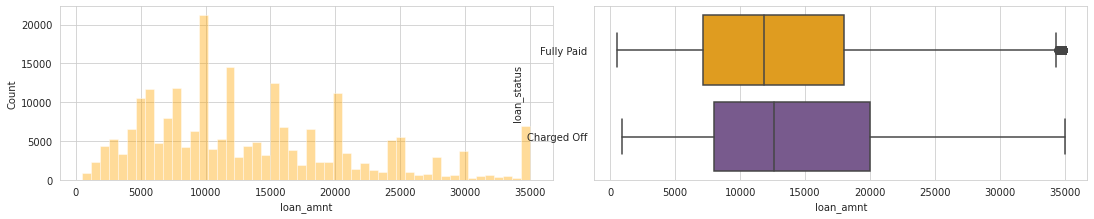

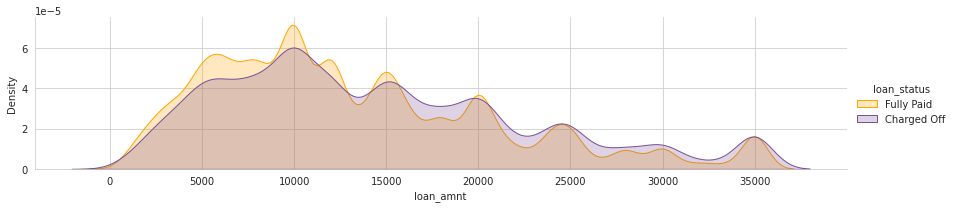

In [ ]:
column_desc('loan_amnt')
visualize('loan_amnt', continuous = True)

# Besaran pinjaman yang akan dipinjam berkisar antara $500 - $35000. 
# Pada pinjaman yang lebih besar > $17500, cenderung tidak bisa dilunasi.

   Features                                                                           Description                                                                            Translate
79     term  The number of payments on the loan. Values are in months and can be either 36 or 60.  Jumlah pembayaran pinjaman. Nilai dalam beberapa bulan dan dapat berupa 36 atau 60.
count         227214
unique             2
top        36 months
freq          178556
Name: term, dtype: object


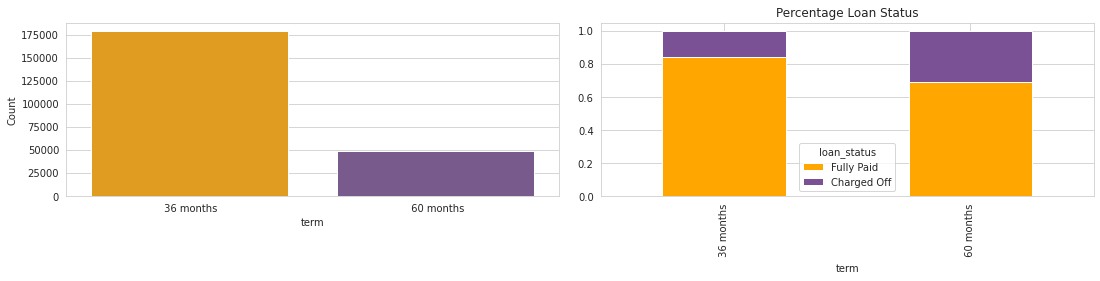

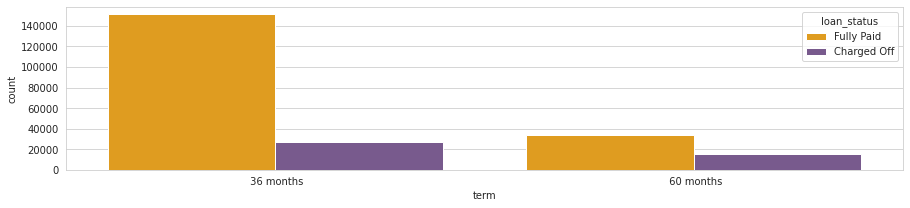

In [ ]:
df_loan['term'].value_counts(normalize=True)
column_desc('term')
visualize('term')

# term dibagi menjadi dua yaitu 36 bulan dan 60 bulan. 78% peminjam mengambil 36 bulan, 
# yang jika kita bandingkan dengan pinjaman term 60 bulan, pinjaman term 36 bulan cenderung 
# berhasil dilunasi. Term yang lebih panjang memiliki charge of rate yang lebih tinggi.

   Features                Description            Translate
34  intrate  Interest Rate on the loan  Suku bunga pinjaman
count    227214.000000
mean         13.768694
std           4.383509
min           5.420000
25%          10.740000
50%          13.610000
75%          16.450000
max          26.060000
Name: int_rate, dtype: float64


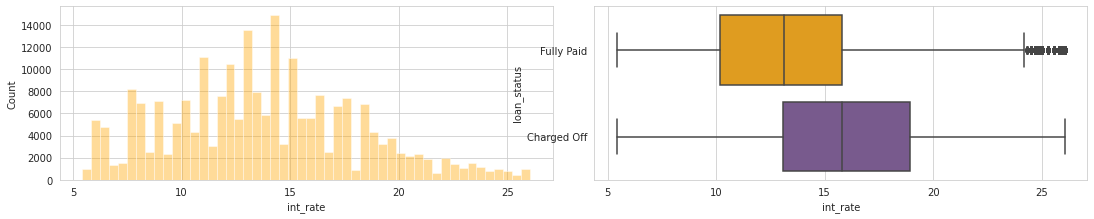

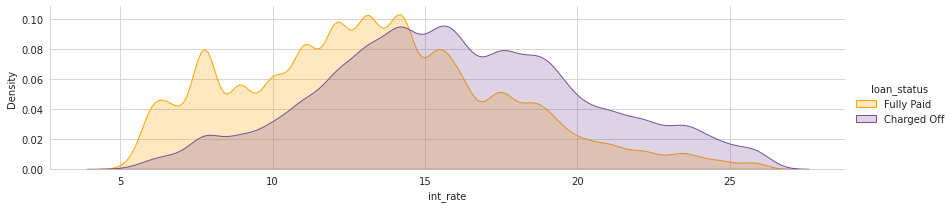

In [ ]:
column_desc('int_rate')
visualize('int_rate', continuous=True)

# dengan suku bunga pinjaman lebih tinggi, pinjaman lebih cenderung tidak dapat dilunasi

       Features                                                       Description                                                              Translate
33  installment  The monthly payment owed by the borrower if the loan originates.  Pembayaran bulanan yang terutang oleh peminjam jika pinjaman berasal.
count    227214.000000
mean        416.489963
std         243.507008
min          15.690000
25%         239.100000
50%         365.010000
75%         545.160000
max        1408.130000
Name: installment, dtype: float64


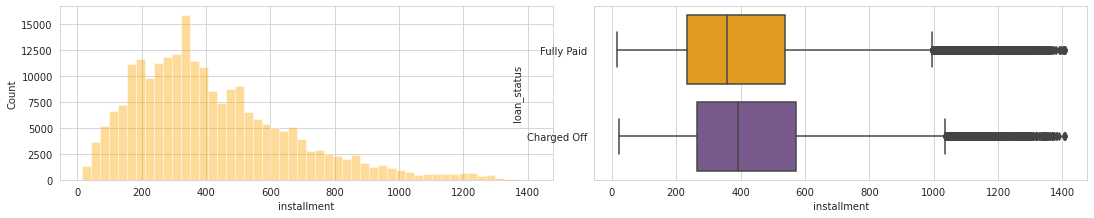

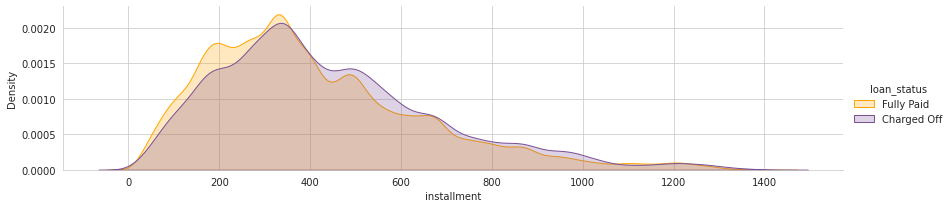

In [ ]:
column_desc('installment')
visualize('installment', continuous=True)

# installment dengan nilai yang lebih besar cenderung lebih gagal dilunasi. Pada fitur ini outlier sangat banyak. 
# akan dihandle setelah model berjalan. Dan melakukan cek apakah handle outlier akan memiliki efek terhadap model.

   Features             Description                     Translate
27    grade  LC assigned loan grade  LC menugaskan nilai pinjaman
count     227214
unique         7
top            B
freq       70119
Name: grade, dtype: object


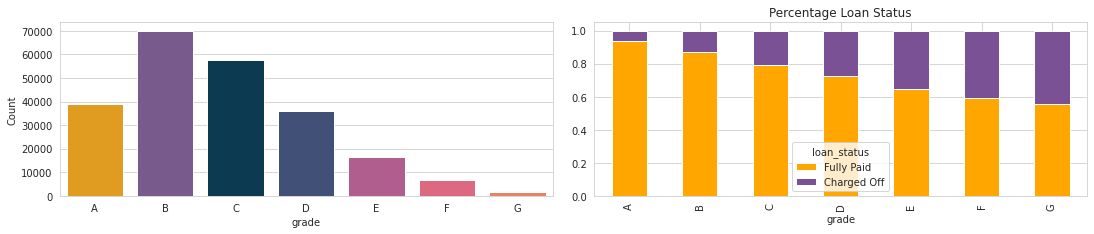

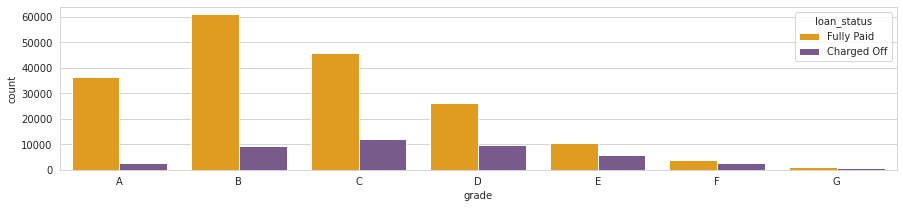

In [ ]:
column_desc('grade')
visualize('grade')

    Features                Description                        Translate
77  subgrade  LC assigned loan subgrade  LC Ditugaskan Subgrade Pinjaman
count     227214
unique        35
top           B3
freq       16943
Name: sub_grade, dtype: object


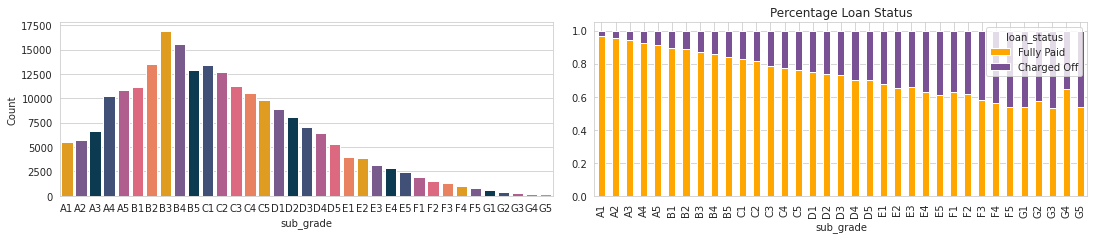

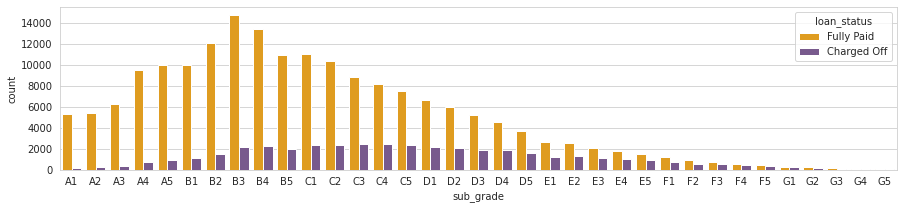

In [ ]:
column_desc('sub_grade')
visualize('sub_grade')

# dari grade dan subgrade, semakin gradenya ke belakang (ascending sort), charged off nya semakin tinggi 

In [ ]:
# untuk emp_length kita akan ubah beberapa value agar lebih mudah untuk divisualisasikan

df_loan['emp_length'].replace('10+ years', '10 years', inplace=True)
df_loan['emp_length'].replace('< 1 year', '0 years', inplace=True)
df_loan['emp_length'].value_counts().sort_index()
df_loan['emp_length'] = df_loan['emp_length'].astype(str)
# df_loan['emp_length'].apply(lambda x : x.split()[0])

# # persentase tiap jenis emp_length
# df_loan['emp_length'].value_counts()/len(df_loan['emp_length'])*100 

     Features                                                                                                                        Description                                                                                                                                                            Translate
21  emplength  Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.  Panjang pekerjaan dalam beberapa tahun. Nilai yang mungkin adalah antara 0 dan 10 di mana 0 berarti kurang dari satu tahun dan 10 berarti sepuluh tahun atau lebih.
count       227214
unique          12
top       10 years
freq         68028
Name: emp_length, dtype: object


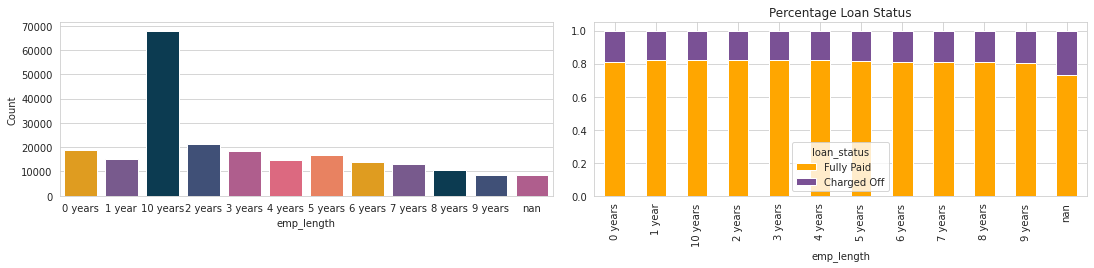

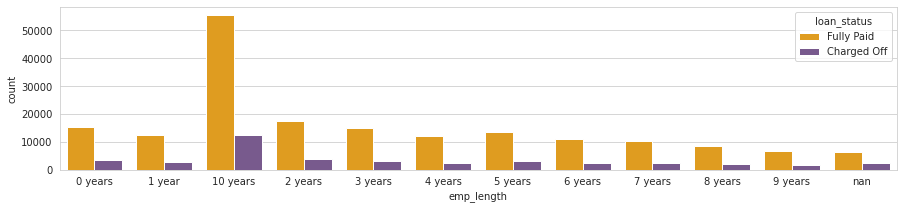

In [ ]:
column_desc('emp_length')
visualize('emp_length')

# hampir 30% data emp_length berada pada nilai > 10 tahun (peminjam yang sudah bekerja 10 tahun atau lebih)
# jika dilihat dari chart "Percentage Loan Status", 
# nilai charged off ratenya hampir sama tiap value, dengan nilai kurang lebih 20%

         Features                                                                                                          Description                                                                                                                              Translate
28  homeownership  The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.  Status kepemilikan rumah yang disediakan oleh peminjam selama pendaftaran. Nilai -nilai kami adalah: sewa, sendiri, hipotek, lainnya.
count       227214
unique           4
top       MORTGAGE
freq        112020
Name: home_ownership, dtype: object


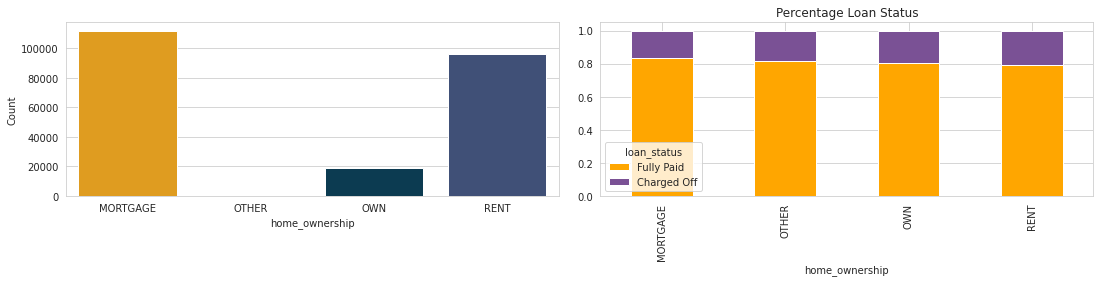

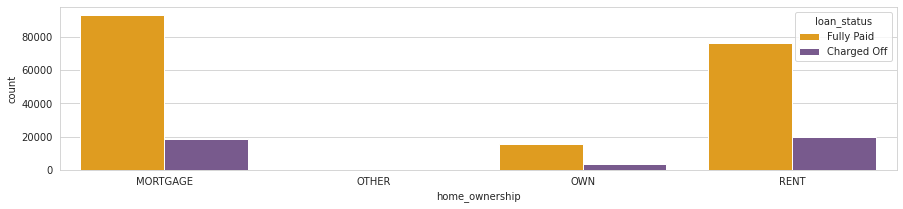

In [ ]:
df_loan['home_ownership'].value_counts()
df_loan['home_ownership'].replace('ANY', 'OTHER', inplace=True)
df_loan['home_ownership'].replace('NONE', 'OTHER', inplace=True)
df_loan['home_ownership'].value_counts()

column_desc('home_ownership')
visualize('home_ownership')

# rate charged off nilainya hampir sama pada tiap tipe home_ownership, 
# meskipun demikian, jumlah dari mortgage dan rent cukup tinggi

    Features                                                                    Description                                                                                      Translate
5  annualinc  The self-reported annual income provided by the borrower during registration.  Penghasilan tahunan yang dilaporkan sendiri yang disediakan oleh peminjam selama pendaftaran.
count    2.272140e+05
mean     7.203479e+04
std      5.529133e+04
min      3.000000e+03
25%      4.500000e+04
50%      6.200000e+04
75%      8.600000e+04
max      7.141778e+06
Name: annual_inc, dtype: float64


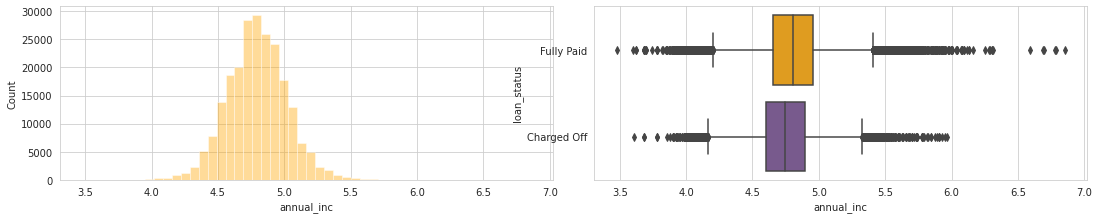

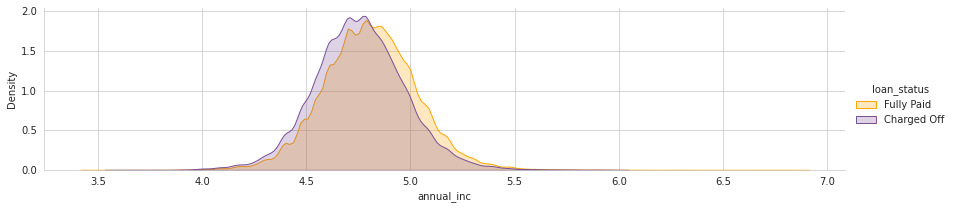

In [ ]:
column_desc('annual_inc')
df_loan['annual_inc'] = np.log10(df_loan['annual_inc'])
visualize('annual_inc', continuous=True)

# dikarenakan data yang sangat besar secara value per recordnya, maka kita log untuk memperkecil datanya
# terlihat persebarannya normal

Verified           37.305800
Not Verified       34.820478
Source Verified    27.873723
Name: verification_status, dtype: float64
Empty DataFrame
Columns: [Features, Description, Translate]
Index: []
count       227214
unique           3
top       Verified
freq         84764
Name: verification_status, dtype: object


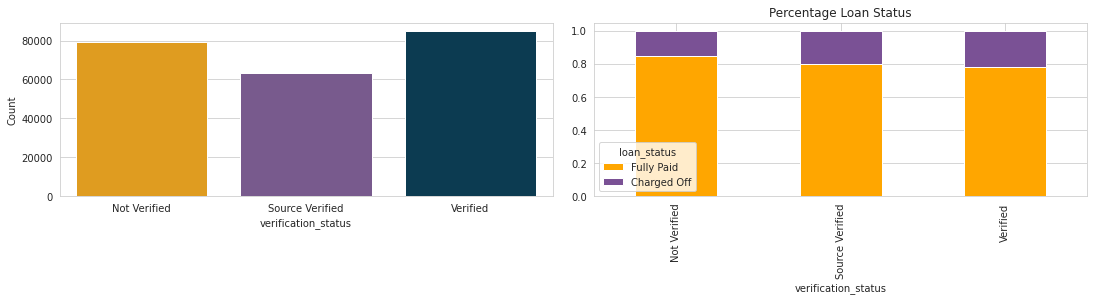

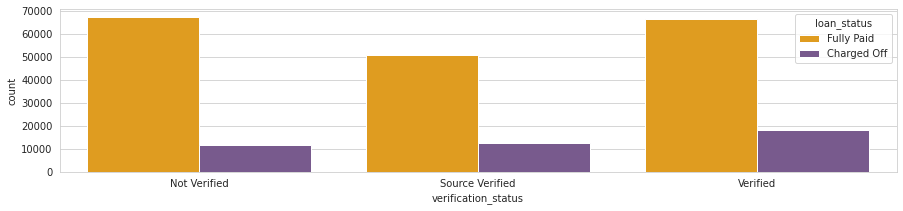

In [ ]:
print(df_loan['verification_status'].value_counts()/len(df_loan['verification_status'])*100)
column_desc('verification_status')
visualize('verification_status')

In [ ]:
# untuk issued_id, data ini ada ketika peminjam berhasil mendapatkan pinjamannya, 
# maka data ini tidak dimasukkan untuk feature 
column_desc('issue_d')

Empty DataFrame
Columns: [Features, Description, Translate]
Index: []
count     227214
unique        91
top       Oct-14
freq        8727
Name: issue_d, dtype: object


   Features                                                 Description                                                          Translate
71  purpose  A category provided by the borrower for the loan request.   Kategori yang disediakan oleh peminjam untuk permintaan pinjaman.
count                 227214
unique                    14
top       debt_consolidation
freq                  132276
Name: purpose, dtype: object
debt_consolidation    132276
credit_card            45549
home_improvement       13202
other                  12834
major_purchase          5720
small_business          4486
car                     3391
medical                 2577
wedding                 1954
moving                  1797
house                   1449
vacation                1403
educational              325
renewable_energy         251
Name: purpose, dtype: int64


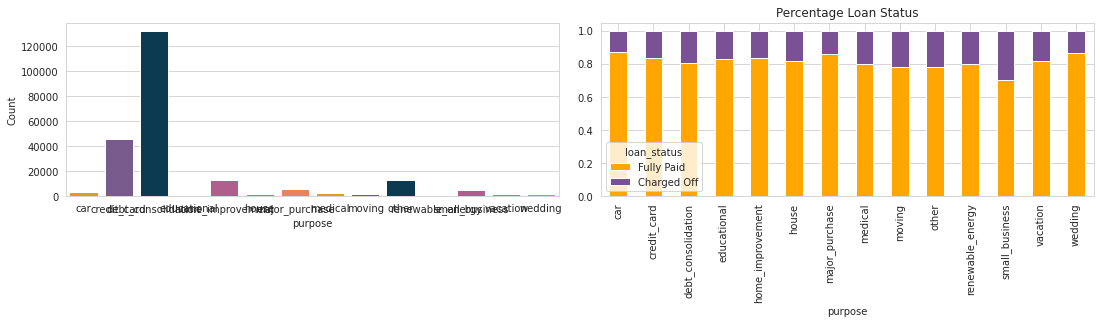

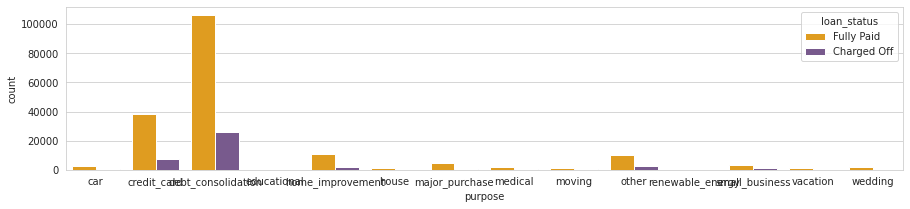

In [ ]:
column_desc('purpose')
print(df_loan['purpose'].value_counts())
visualize('purpose')

In [ ]:
df_loan.groupby('purpose')['loan_status'].value_counts(normalize=True)[:,'Charged Off'].sort_values()
# charge off rate paling tinggi pada kategori small_business sedangkan car dan wedding kurang lebih 12-13% saja

purpose
car                   0.125332
wedding               0.135619
major_purchase        0.141259
home_improvement      0.161036
credit_card           0.162023
educational           0.172308
vacation              0.180328
house                 0.184265
debt_consolidation    0.195311
medical               0.202949
renewable_energy      0.203187
other                 0.215911
moving                0.218698
small_business        0.294695
Name: loan_status, dtype: float64

In [ ]:
df_loan.groupby('addr_state')['loan_status'].value_counts(normalize=True)[:,'Charged Off'].sort_values()

# NE memiliki charged off level paling tinggi >57% peminjamnya 'charged off'
# dan yang paling sedikit yaitu DC

addr_state
DC    0.105195
WY    0.134686
MT    0.135747
AK    0.146865
WV    0.147348
NH    0.147651
CO    0.148567
TX    0.163714
SC    0.164965
IA    0.166667
ID    0.166667
SD    0.170082
CT    0.170401
OR    0.172183
MA    0.173169
KS    0.173659
IL    0.173741
UT    0.174356
VT    0.175393
WA    0.175959
CA    0.177380
GA    0.177747
AZ    0.180743
WI    0.181618
RI    0.185950
VA    0.186372
MN    0.188197
MD    0.193429
PA    0.193939
DE    0.194828
HI    0.196784
OH    0.198184
NC    0.198668
NJ    0.199109
NY    0.199291
LA    0.201289
AR    0.202014
KY    0.202445
OK    0.203354
MO    0.203791
MI    0.204696
NM    0.207993
FL    0.211020
AL    0.218085
NV    0.219296
IN    0.239377
TN    0.253876
MS    0.265957
NE    0.571429
Name: loan_status, dtype: float64

   Features                                                                                                                                                                                               Description                                                                                                                                                                                                                    Translate
16      dti  A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.  Rasio yang dihitung menggunakan total pembayaran utang bulanan peminjam atas total kewajiban utang, tidak termasuk hipotek dan pinjaman LC yang diminta, dibagi dengan pendapatan bulanan peminjam yang dilaporkan sendiri.
count    227214.000000
mean         16.364585
std           7.669631
min           0.000000
25%          10.660000
50%          16

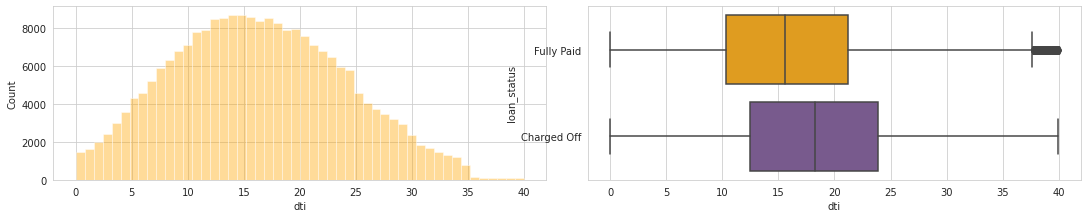

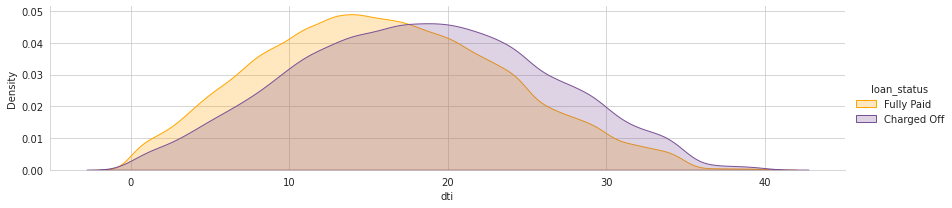

In [ ]:
column_desc('dti')
visualize('dti', continuous=True)

In [ ]:
column_desc('earliest_cr_line')

          Features                                                       Description                                                         Translate
18  earliestcrline  The date the borrower's earliest reported credit line was opened  Tanggal jalur kredit yang paling awal dilaporkan peminjam dibuka
count     227214
unique       632
top       Oct-00
freq        1944
Name: earliest_cr_line, dtype: object


In [ ]:
today = datetime.date.today()
temp = pd.DataFrame()
temp['bulan'] = df_loan['earliest_cr_line'].apply(lambda x: x.split('-')[0])
temp['tahun'] = df_loan['earliest_cr_line'].apply(lambda x: x.split('-')[1])
temp['tahun'] = temp['tahun'].apply(lambda x : '19'+x if int(x) >= 46 else '20'+x)
df_loan['earliest_cr_line'] = temp['bulan'] + '-' + temp['tahun']
tanggal = df_loan['earliest_cr_line'].apply(lambda x : datetime.datetime.strptime(x, '%b-%Y').date())
df_loan['earliest_cr_line'] = tanggal.apply(lambda x: (today - x).days/365)

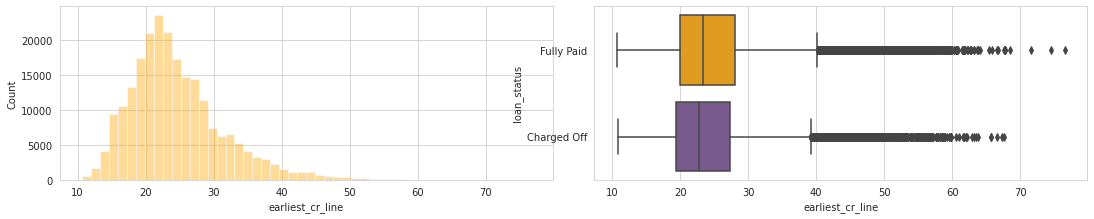

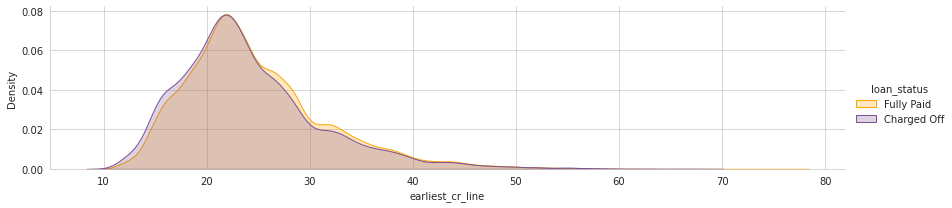

In [ ]:
 visualize('earliest_cr_line', continuous=True)

 # untuk earliest_cr_line, lakukan pengubahan menjadi value yang lebih bermakna
 # kita hitung berapa tahun dari hari ini ke masing-masing bulan-tahun yang ada pada data
 # jika kita lihat charged off nya, maka peminjam yang lebih baru cenderung memiliki charged of status
 # meskipun jika kita bandingkan dengan fully paid hanya berselesih sedikit

In [ ]:
print(df_loan['mths_since_last_delinq'].isnull().sum()/df_loan.shape[0], df_loan['mths_since_last_record'].isnull().sum()/df_loan.shape[0])
# kita akan drop dua kolom ini, karena null value nya lebih dari 50%

0.5636052355928772 0.8827316978707298


   Features                                                     Description                                                Translate
66  openacc  The number of open credit lines in the borrower's credit file.  Jumlah jalur kredit terbuka dalam file kredit peminjam.
count    227214.000000
mean         10.832713
std           4.798421
min           0.000000
25%           7.000000
50%          10.000000
75%          13.000000
max          76.000000
Name: open_acc, dtype: float64


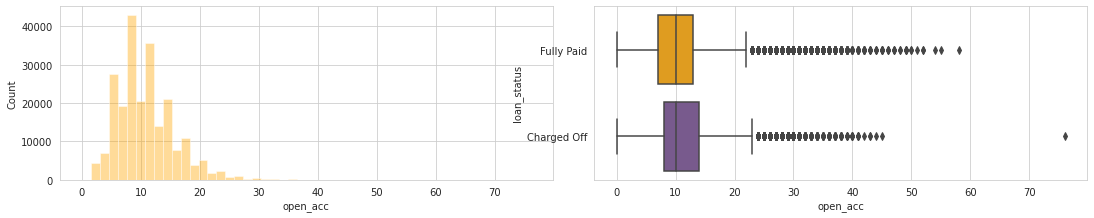

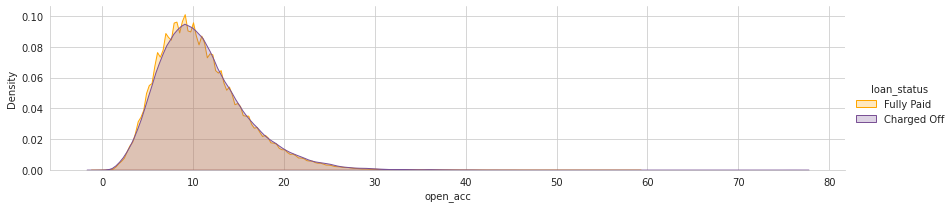

In [ ]:
column_desc('open_acc')
visualize('open_acc', continuous=True)

In [ ]:
df_loan.groupby('loan_status')['open_acc'].describe()
# dilihat bahwa mean dan std nya tidak jauh berbeda (terlihat pada chart juga), 
# diasumsikan tidak ada perbedaan signifikan antara keduanya

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,42475.0,10.999317,4.887882,0.0,8.0,10.0,14.0,76.0
Fully Paid,184739.0,10.794407,4.776807,0.0,7.0,10.0,13.0,58.0


   Features                          Description                            Translate
70   pubrec  Number of derogatory public records  Jumlah catatan publik yang menghina
count    227214.000000
mean          0.132919
std           0.418090
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: pub_rec, dtype: float64


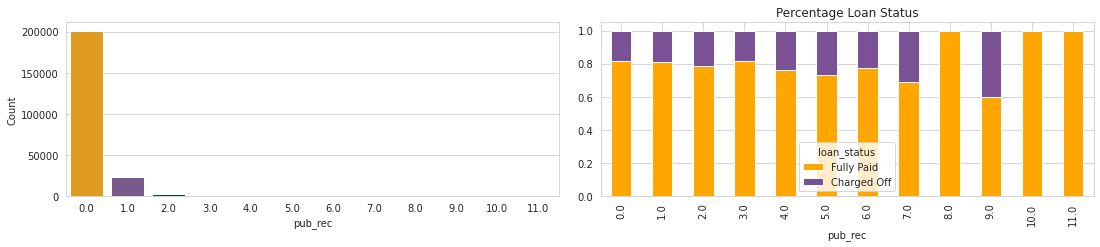

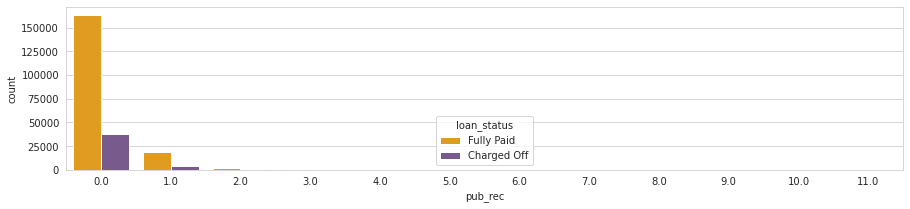

In [ ]:
column_desc('pub_rec')
visualize('pub_rec')

In [ ]:
df_loan['pub_rec'].value_counts(normalize=True)
# 88% data pada value 0.0, jika dilihat yang jumlah catatannya >=2 hanya 2% dari keseluruhan data

0.0     0.885680
1.0     0.101952
2.0     0.008714
3.0     0.002297
4.0     0.000717
5.0     0.000343
6.0     0.000154
7.0     0.000070
9.0     0.000022
8.0     0.000022
10.0    0.000022
11.0    0.000004
Name: pub_rec, dtype: float64

In [ ]:
df_loan['revol_bal'].min()

0

    Features                     Description                     Translate
74  revolbal  Total credit revolving balance  Total Saldo Revolving Credit
count    2.272140e+05
mean     1.507319e+04
std      1.812469e+04
min      0.000000e+00
25%      5.929000e+03
50%      1.100000e+04
75%      1.904700e+04
max      1.746716e+06
Name: revol_bal, dtype: float64


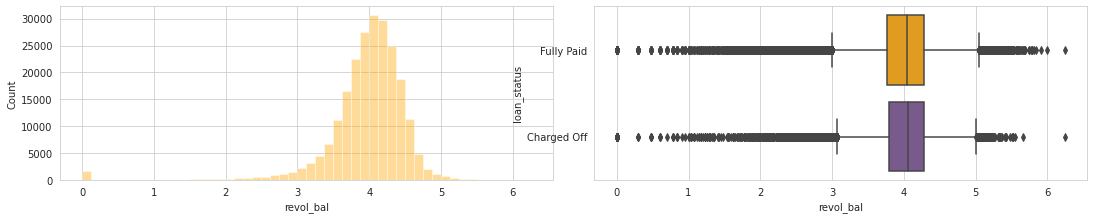

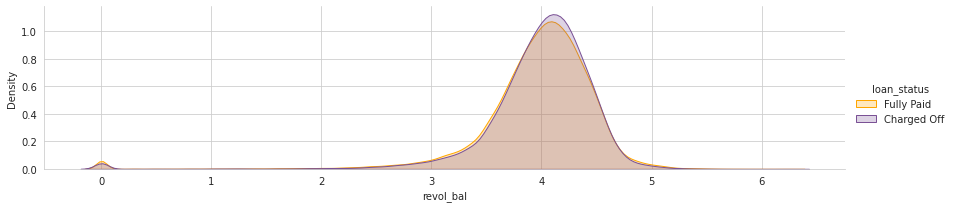

In [ ]:
column_desc('revol_bal')
df_loan['revol_bal'] = np.log10(df_loan['revol_bal']+1)
visualize('revol_bal', continuous=True)

# karena ada value 0, maka log(value+1)
# charged off nya sedikit lebih tinggi dari fully paid rate

     Features                                                                                                                 Description                                                                                                                              Translate
75  revolutil  Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.  Tingkat pemanfaatan jalur bergulir, atau jumlah kredit yang digunakan peminjam relatif terhadap semua kredit revolving yang tersedia.
count    227028.000000
mean         54.841070
std          24.693604
min           0.000000
25%          37.000000
50%          56.500000
75%          74.300000
max         892.300000
Name: revol_util, dtype: float64


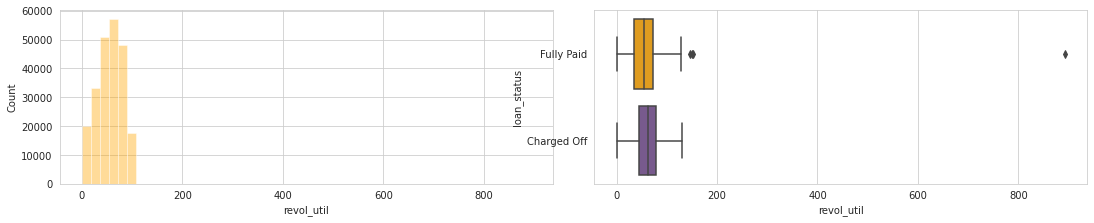

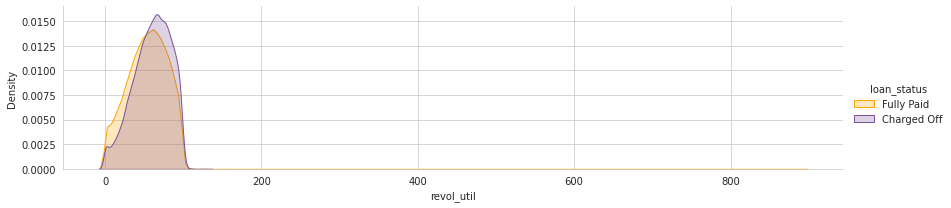

In [ ]:
column_desc('revol_util')
visualize('revol_util', continuous=True)
# dari chart ketiga, dapat dilihat bahwa charged off memiliki revol_util yang lebih tinggi

    Features                                                               Description                                                      Translate
86  totalacc  The total number of credit lines currently in the borrower's credit file  Jumlah total jalur kredit saat ini dalam file kredit peminjam
count    227214.000000
mean         24.814026
std          11.620662
min           2.000000
25%          16.000000
50%          23.000000
75%          32.000000
max         150.000000
Name: total_acc, dtype: float64


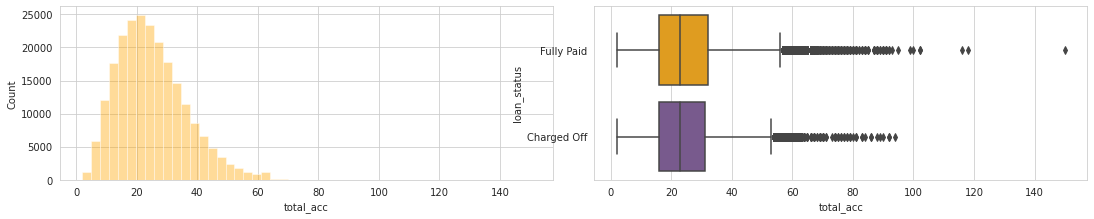

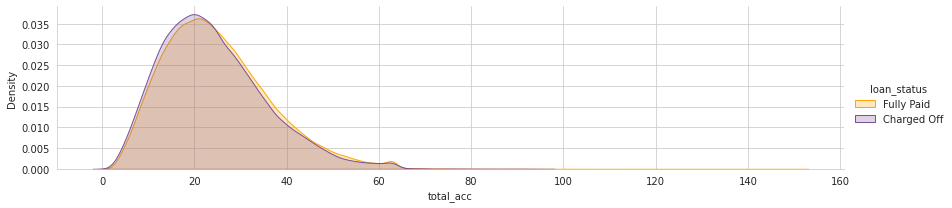

In [ ]:
column_desc('total_acc')
visualize('total_acc', continuous=True)

# pinjaman charged off cendering memiliki total_acc yang lebih rendah

In [ ]:
df_loan.groupby('initial_list_status')['loan_status'].value_counts(normalize=True)

initial_list_status  loan_status
f                    Fully Paid     0.815620
                     Charged Off    0.184380
w                    Fully Paid     0.805472
                     Charged Off    0.194528
Name: loan_status, dtype: float64

             Features                                                         Description                                                      Translate
31  initialliststatus  The initial listing status of the loan. Possible values are – W, F  Status daftar awal pinjaman. Nilai yang mungkin adalah - w, f
count     227214
unique         2
top            f
freq      169937
Name: initial_list_status, dtype: object


initial_list_status  loan_status
f                    Fully Paid     0.815620
                     Charged Off    0.184380
w                    Fully Paid     0.805472
                     Charged Off    0.194528
Name: loan_status, dtype: float64

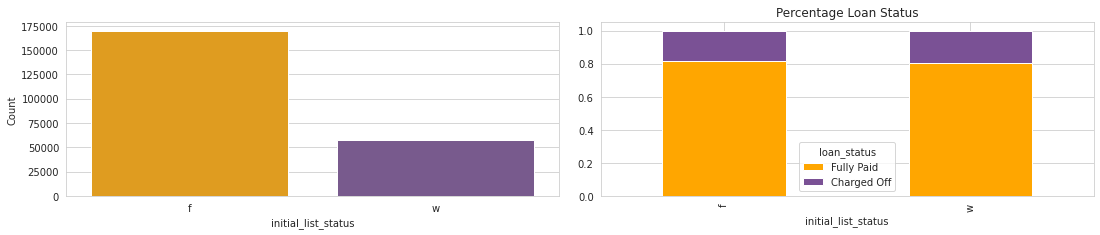

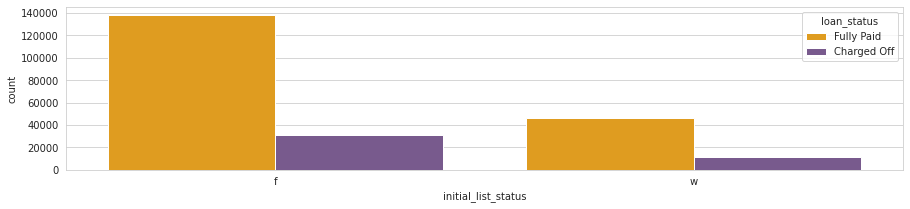

In [ ]:
column_desc('initial_list_status')
visualize('initial_list_status')
df_loan.groupby('initial_list_status')['loan_status'].value_counts(normalize=True)
# w cenderung memiliki charged of yang lebih tinggi 1% dari f

In [ ]:
 df_loan['next_pymnt_d'].notnull().sum()
 # kolom ini kosong ketika kita hanya mengambil status "Charged Off" dan "Fully Paid" saja
 # we will drop later

0

In [ ]:
df_loan['mths_since_last_major_derog'].isnull().sum()/df_loan.shape[0]
# null values nya mencapai >80% kita akan melakukan drop

0.8238752893747744

In [ ]:
df_loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti',
       'earliest_cr_line', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'next_pymnt_d', 'mths_since_last_major_derog'],
      dtype='object')

##### Deal with null values
Kita sudah berhasil melakukan drop kolom yang benar-benar kosong. 
Namun kita perlu mengambil tindakan untuk kolom lainnya yang memiliki null value rate < 100%. Untuk menentukan apakah kita perlu imputation atau kita drop row/kolom nya

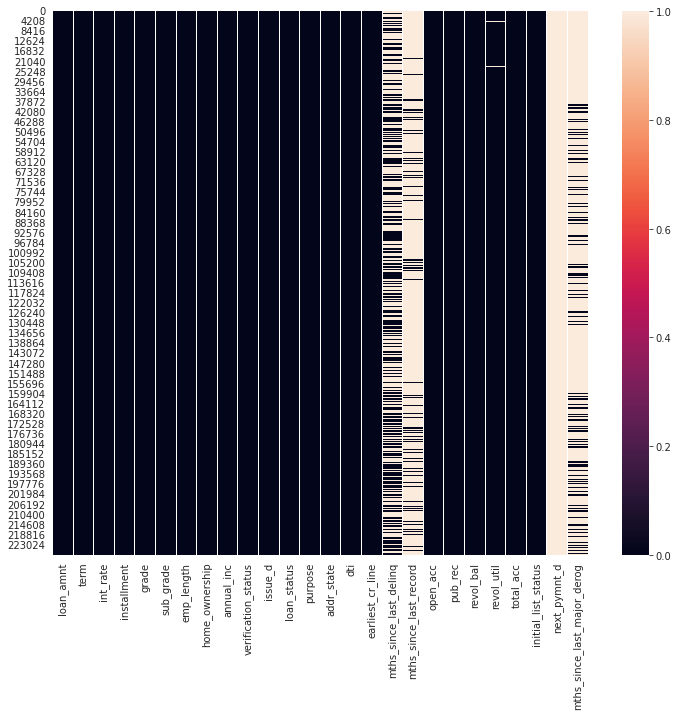

In [ ]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(df_loan.isna())

In [ ]:
# Drop column which has null values rate more than 50%
temp = pd.DataFrame(df_loan.isnull().sum()/df_loan.shape[0]*100).reset_index()
temp.rename(columns={0:'percentage','index':'attribute'}, inplace=True)
temp.sort_values('percentage')

,attribute,percentage
0,loan_amnt,0.000000
23,initial_list_status,0.000000
22,total_acc,0.000000
20,revol_bal,0.000000
19,pub_rec,0.000000
18,open_acc,0.000000
15,earliest_cr_line,0.000000
14,dti,0.000000
13,addr_state,0.000000
11,loan_status,0.000000


In [ ]:
# Drop column which has null values rate more than 50%
drop_null = temp[temp['percentage']>48]['attribute'].to_list()
df_loan.drop(drop_null, axis=1, inplace=True)


In [ ]:
# Untuk data yang terdapat null valuesnya, namun sangat sedikit persentase null nya, kita bisa melakukan imputation
list_impute = temp[(temp['percentage']>0) & (temp['percentage']<48)]['attribute']
list_impute

21    revol_util
Name: attribute, dtype: object

In [ ]:
column_desc('revol_util')

     Features                                                                                                                 Description                                                                                                                              Translate
75  revolutil  Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.  Tingkat pemanfaatan jalur bergulir, atau jumlah kredit yang digunakan peminjam relatif terhadap semua kredit revolving yang tersedia.
count    227028.000000
mean         54.841070
std          24.693604
min           0.000000
25%          37.000000
50%          56.500000
75%          74.300000
max         892.300000
Name: revol_util, dtype: float64


In [ ]:
#Impute with mean for revol_util
df_loan['revol_util'].fillna(df_loan['revol_util'].mean(), inplace=True)

In [ ]:
df_loan.isnull().notnull().any()

loan_amnt              True
term                   True
int_rate               True
installment            True
grade                  True
sub_grade              True
emp_length             True
home_ownership         True
annual_inc             True
verification_status    True
issue_d                True
loan_status            True
purpose                True
addr_state             True
dti                    True
earliest_cr_line       True
open_acc               True
pub_rec                True
revol_bal              True
revol_util             True
total_acc              True
initial_list_status    True
dtype: bool

### Correlation

In [ ]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227214 entries, 0 to 227213
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            227214 non-null  int64  
 1   term                 227214 non-null  object 
 2   int_rate             227214 non-null  float64
 3   installment          227214 non-null  float64
 4   grade                227214 non-null  object 
 5   sub_grade            227214 non-null  object 
 6   emp_length           227214 non-null  object 
 7   home_ownership       227214 non-null  object 
 8   annual_inc           227214 non-null  float64
 9   verification_status  227214 non-null  object 
 10  issue_d              227214 non-null  object 
 11  loan_status          227214 non-null  object 
 12  purpose              227214 non-null  object 
 13  addr_state           227214 non-null  object 
 14  dti                  227214 non-null  float64
 15  earliest_cr_line 

In [ ]:
numerical = df_loan.select_dtypes(exclude=['object']).columns
numerical

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc'],
      dtype='object')

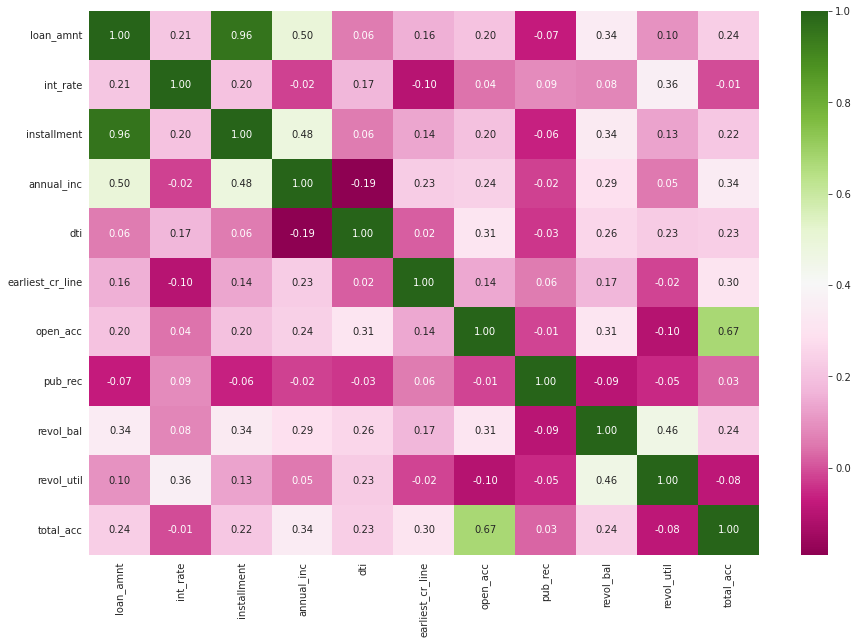

In [ ]:
fig, axes = plt.subplots(figsize=(15,10)) 
cm_df = sns.heatmap(df_loan[numerical].corr(),annot=True, fmt = ".2f", cmap = "PiYG")

In [ ]:
# ada korelasi kuat antara 
# - loan_amnt dan installment
# - open_acc dan total_acc

In [ ]:
df_loan['issue_d'].iloc[0].split('-')[0]
issue = pd.DataFrame()
issue['month'] = df_loan['issue_d'].apply(lambda x: x.split('-')[0])
issue['year'] = df_loan['issue_d'].apply(lambda x: x.split('-')[1])
issue['year'] = issue['year'].apply(lambda x: '19'+str(x) if int(x) >=46 else '20'+str(x))

Text(0.5, 1.0, 'Jumlah Pinjaman per Tahun')

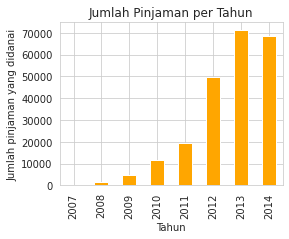

In [ ]:
issue['waktu'] = issue['month'] + '-' + issue['year']
issue['waktu'] = issue['waktu'].apply(lambda x: datetime.datetime.strptime(x, '%b-%Y').date())
issue['waktu'] = pd.to_datetime(issue['waktu'])

plt.figure(figsize=(4,3))
issue['waktu'].dt.year.value_counts().sort_index().plot.bar()
plt.xlabel('Tahun')
plt.ylabel('Jumlah pinjaman yang didanai')
plt.title('Jumlah Pinjaman per Tahun')

### Handle Categorical Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import make_column_transformer

In [ ]:
def get_categorical_list(data):
  categorical_list = data.select_dtypes(include=['object']).columns.to_list()
  categorical_list.remove('addr_state')
  categorical_list.remove('issue_d')
  categorical_list.remove('loan_status')
  print(categorical_list)
  return categorical_list

In [ ]:
df_categorical = df_loan[get_categorical_list(df_loan)]

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status']


In [ ]:
transformer1 = make_column_transformer(
    (OneHotEncoder(), ['term', 'home_ownership', 'verification_status', 'initial_list_status']),
    remainder='passthrough')

transformed1 = transformer1.fit(df_categorical[['term', 'home_ownership', 'verification_status', 'initial_list_status']])
transformed1 = transformer1.transform(df_categorical[['term', 'home_ownership', 'verification_status', 'initial_list_status']])

In [ ]:
df_categorical[transformer1.get_feature_names()] = transformed1
df_categorical.drop(['term', 'home_ownership', 'verification_status', 'initial_list_status'], axis=1, inplace=True)

In [ ]:
ohe = OneHotEncoder()
ohe.fit(df_categorical[['purpose']])
trans = ohe.transform(df_categorical[['purpose']])
df_categorical[ohe.categories_[0]] = trans.toarray()
df_categorical.drop(['purpose'], axis=1, inplace=True)

In [ ]:
le_grade = LabelEncoder()
le_grade.fit(df_categorical['grade'])
df_categorical['grade'] = le_grade.transform((df_categorical['grade']))

le_sub_grade = LabelEncoder()
le_sub_grade.fit(df_categorical['sub_grade'])
df_categorical['sub_grade'] = le_sub_grade.transform((df_categorical['sub_grade']))

le_emp = LabelEncoder()
le_emp.fit(df_categorical['emp_length'])
df_categorical['emp_length'] = le_emp.transform((df_categorical['emp_length']))

In [ ]:
df_categorical.head().T

,0,1,2,3,4
grade,1.0,2.0,2.0,2.0,0.0
sub_grade,6.0,13.0,14.0,10.0,3.0
emp_length,2.0,0.0,2.0,2.0,4.0
onehotencoder__x0_ 36 months,1.0,0.0,1.0,1.0,1.0
onehotencoder__x0_ 60 months,0.0,1.0,0.0,0.0,0.0
onehotencoder__x1_MORTGAGE,0.0,0.0,0.0,0.0,0.0
onehotencoder__x1_OTHER,0.0,0.0,0.0,0.0,0.0
onehotencoder__x1_OWN,0.0,0.0,0.0,0.0,0.0
onehotencoder__x1_RENT,1.0,1.0,1.0,1.0,1.0
onehotencoder__x2_Not Verified,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_categorical.shape

(227214, 28)

### Handle Numerical Data

Harusnya disini kita bisa melakukan normalisasi dan lainnya, namun karna waktu yang terbatas tidak terhandle.

In [ ]:
df_numerical = df_loan.select_dtypes(exclude=['object'])
df_categorical.index = df_numerical.index
x = pd.concat([df_numerical, df_categorical], axis=1)

In [ ]:
x.head()

,loan_amnt,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,5000,10.65,162.87,4.380211,27.65,37.526027,3.0,0.0,4.135101,83.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2500,15.27,59.83,4.477121,1.00,23.271233,3.0,0.0,3.227372,9.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2400,15.96,84.33,4.088207,8.72,20.682192,2.0,0.0,3.470851,98.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,10000,13.49,339.31,4.691965,20.00,26.435616,10.0,0.0,3.748110,21.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5000,7.90,156.46,4.556303,11.20,17.679452,9.0,0.0,3.901131,28.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Handle Target

In [ ]:
y = df_loan['loan_status'].apply(lambda x : 1 if x == 'Fully Paid' else 0)

### Split data to train, validation, test

In [ ]:
df_loan.shape

(227214, 22)

In [ ]:
# def split_x_y(dataset, target_column):
#   df_target = dataset[target_column]
#   df_feature = dataset.drop([target_column], axis=1)

#   return df_feature, df_target

In [ ]:
# x, y = split_x_y(df_loan, TARGET)
# print(x.shape, y.shape)

(227214, 21) (227214,)


In [ ]:
def split_train_test(feature, target, test_size):
  x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=test_size, random_state=93)
  return x_train, x_test, y_train, y_test

In [ ]:
x_train, x_test, y_train, y_test = split_train_test(x, y, TEST_SIZE)
x_train, x_validate, y_train, y_validate = split_train_test(x_train, y_train, TEST_SIZE)

(145416, 39) (36355, 39) (145416,) (36355,)


In [ ]:
print(x_train.shape, x_validate.shape, y_train.shape, y_validate.shape, x_test.shape, y_test.shape)

(145416, 39) (36355, 39) (145416,) (36355,) (45443, 39) (45443,)


### Model and Predict

Disini digunakan model random forest dikarenakan, tidak sempat melakukan scaling maupun normalization.
Sehingga dipilih model yang tidak banyak terpengaruh oleh kedua proses tersebut

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42, max_features= 'sqrt' ,n_estimators=50) 
param_grid_rf = {
    'n_estimators': [50], # The number of randomized trees to build 
    'class_weight': [{0:1, 1:1}] #'model__class_weight': [{0:1, 1:1}, {0:1,1:2}, {0:1, 1:3}, {0:1, 1:4}]
}

In [ ]:
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='roc_auc',n_jobs=-1,pre_dispatch='2*n_jobs', cv=3, verbose=1, return_train_score=False)

In [ ]:
grid_rf.fit(x_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_features='sqrt',
                                              n_estimators=50, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}], 'n_estimators': [50]},
             scoring='roc_auc', verbose=1)

In [ ]:
rf_estimator = grid_rf.best_estimator_
print('Best score: ', grid_rf.best_score_)
print('Best parameters set: \n', grid_rf.best_params_)

Best score:  0.6836118281588481
Best parameters set: 
 {'class_weight': {0: 1, 1: 1}, 'n_estimators': 50}


In [ ]:
y_pred_validate = grid_rf.predict(x_validate)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_validate, y_pred_validate))

Accuracy: 0.8142208774583963


In [ ]:
y_pred_test = grid_rf.predict(x_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

Accuracy: 0.8100477521290408
